<img src="./img/vs265header.svg"/>


<h1 align="center">Lab 3 - Unsupervised Learning </h1>
<h2 align="center"> Part 1 - Simple Datasets </h2>

In [1]:
### Connor Bybee, Justin Theiss, Nick Cinko, Steven Shepard, Jasmine Collins, Steven Lee

### This lab uses alot of animation so you may want to open your notebook 
### with 'jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000'
### so it doesn't throw warnings constantly.
### *** NOTE *** ###

%matplotlib notebook

import numpy as np

import utils.lab3utils as util

## 1. Hebbian Learning as Neural PCA

The file `data/data2d.npz` contains two arrays of data that will be used for this problem, $D_1$ and $D_2$, each of which contains 1000 data points in two dimensions. We load it in the cell below.

In [2]:
# First we load the D1 data from data2d.npz
D1 = np.load('./data/data2d.npz')['D1']

### Unconstrained Hebbian Learning

Train a single linear neuron on this data using Hebbian learning (unconstrained). Plot the weight vector along with the data on each weight update.

The data-loading and results-plotting code has been provided for you. You just need to add the missing lines to the function `hebbLearn` below.

In [3]:
def hebbLearn(dataset, weights, learningRate):
    """
    Weight update with a Hebbian rule.
    weights should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2, shape=(2, 1000)
    weights      : numpy array, weight matrix of linear transformation of input 
                   data, shape=(2, N) where N is the number of neurons
    learningRate : float, scaling factor for gradients
    
    Returns
    -------
    weights      : numpy array, Hebbian-updated weight matrix 
                   of linear transformation of input data
    """
    
    _, numDatapoints = dataset.shape
    batchLearningRate = learningRate/numDatapoints
    
    output = weights.T @ dataset
#     print (weights.shape)
    dw = dataset @ output.T #- compute dw: Hebbian learning rule 
    weights += batchLearningRate* dw #- update weight vector by dw using batchLearningRate
    
    return weights

<IPython.core.display.Javascript object>


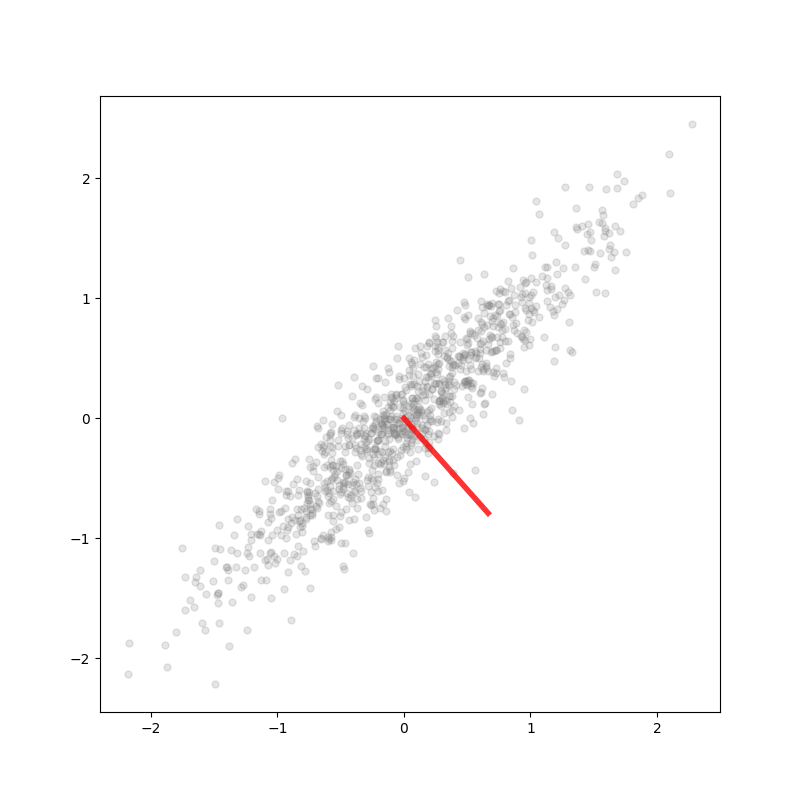

In [4]:
# First we set the hyperparameters
numTrials = 250
learningRate = 0.01

# Now we initialize the run
figure, plottedWeightVector, weights = util.initialize(D1)

# and then iterate on weight updates
weights = util.doLearn(hebbLearn, D1, figure, plottedWeightVector, weights, learningRate, numTrials)

<font color="green"> Answer: </font> 
First eigen vector directions appears to be learnt

### Oja's Rule

Now apply Oja’s single-neuron learning rule to constrain the growth of
the weight vector, and again show how the weight vector evolves during
learning. As before, you only need to add a few lines to the `ojaLearn` function below.

In [5]:
def ojaLearn(dataset,weights,learningRate):
    """
    Weight update with the Oja rule.
    weights should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2, shape=(2, 1000)
    weights      : numpy array, weight matrix of linear transformation of input 
                   data, shape=(2, N) where N is the number of neurons
    learningRate : float, scaling factor for gradients

    Returns
    -------
    weights      : numpy array, Oja-updated weight matrix 
                   of linear transformation of input data
    """
    
    _, numDatapoints = dataset.shape
    batchLearningRate = learningRate/numDatapoints
    
    output = weights.T @ dataset# YOUR CODE: compute neuron output for all data
    
    dw = dataset@output.T - (weights@ output)@output.T # YOUR CODE: compute dw: Oja learning rule 

    weights += batchLearningRate* dw #YOUR CODE: update weight vector by dw using batchLearningRate
    
    return weights

<IPython.core.display.Javascript object>


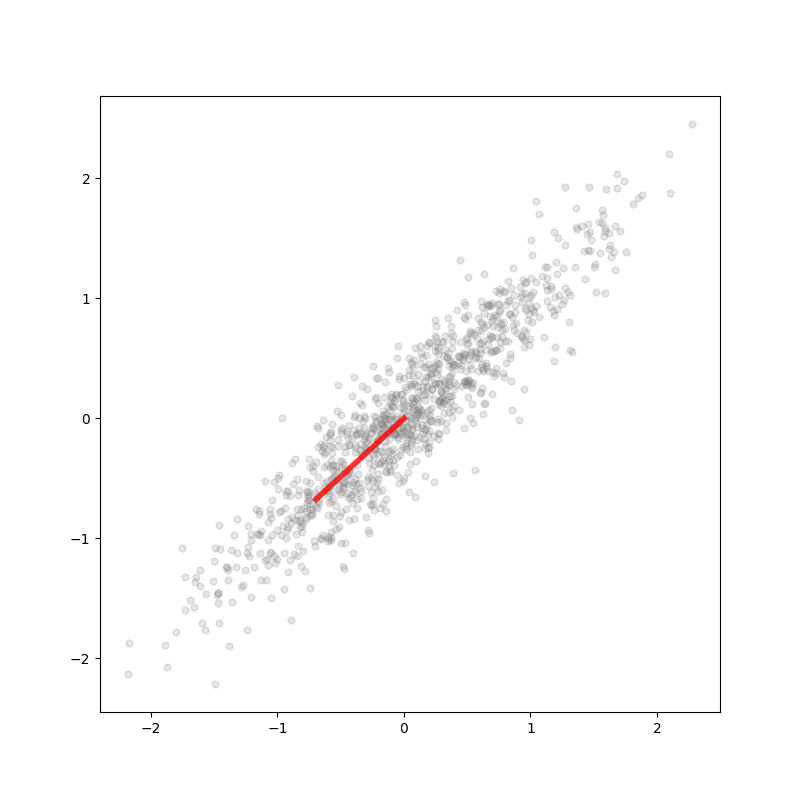

In [6]:
# first we set the hyperparameters
numTrials = 250
learningRate = 0.01

# now we initialize the run
figure, plottedWeightVector, weights = util.initialize(D1)

# and then iterate
weights = util.doLearn(ojaLearn, D1, figure, plottedWeightVector, weights, learningRate, numTrials)

What is different about the weight vector learned by Oja's Rule?

 <font color="green"> Answer: </font> 
 With Oja's rule, weight vector remains scaled at unit length as it is transformed in learning process 
 

### Sanger's Rule 

Use Sanger’s rule to train two neurons to represent the principal components
of the data.  Make sure you run the algorithm for long enough (>1000 steps)!

In [7]:
def sangerLearn(dataset,weights,learningRate):
    """
    Weight update with the Sanger rule.
    weights and learningRate should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2, shape=(2, 1000)
    weights      : numpy array, weight matrix of linear transformation of input 
                   data, shape=(2, N) where N is the number of neurons
    learningRate : float, scaling factor for gradients
    
    Returns
    -------
    weights      : numpy array, Sanger-updated weight matrix 
                   of linear transformation of input data
    """
    _, numDatapoints = dataset.shape
    batchLearningRate = learningRate/numDatapoints
    
    output = weights.T @ dataset #YOUR CODE: compute neuron output for all data
    numOutputs = output.shape[0]
    
    residual = dataset # Dimensions are 2 , 1000
    dw = np.zeros(weights.shape)
    
    for i in range(numOutputs):
        
        residual = residual - (weights[:,i,None]@ output [None, i,:])#YOUR CODE: what component of the input 
                                     #is explained by neurons before neuron i?
        
        dw[:,i] = output[i,:]@ residual.T# YOUR CODE: use the residual to update weights for neuron i

    weights += batchLearningRate* dw# YOUR CODE: update weight vector by dw using batchLearningRate
    
    return weights

<IPython.core.display.Javascript object>


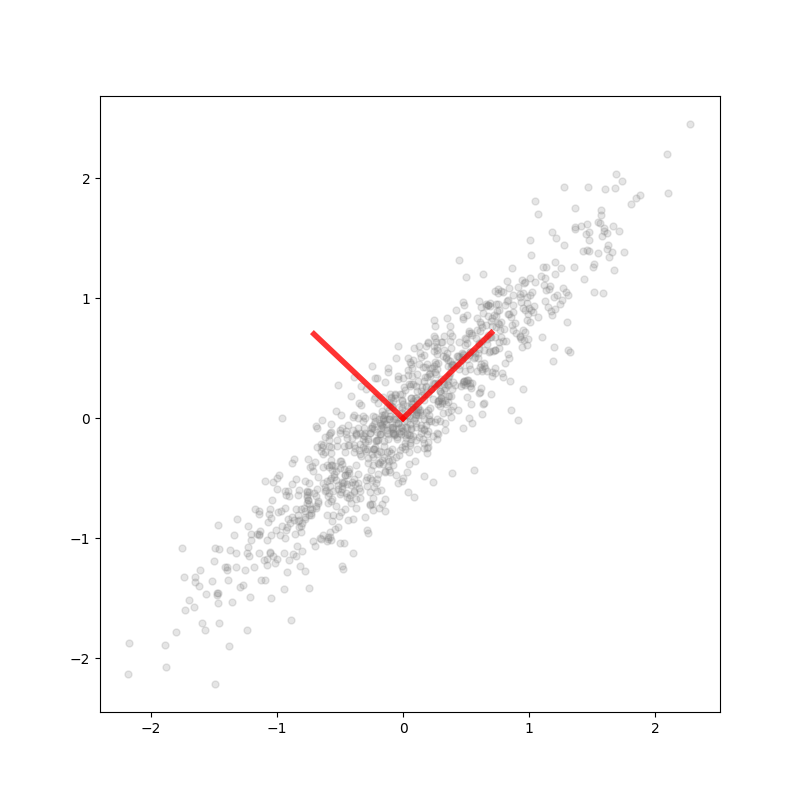

In [8]:
# first we set the hyperparameters
numTrials = 1100
learningRate = 0.1

# now we initialize the run and view the data
figure, plottedWeightVectors, weights = util.initialize(D1,numOutputs=2)

# and then iterate
weights = util.doLearn(sangerLearn, D1, figure, plottedWeightVectors, weights, learningRate, numTrials)

<font color="green"> Answer: </font> 
Angles are 90 degrees, perpendicular to each other. 

### Non-Gaussian Data

Now, run the cells below to load the dataset `D2` and learn weight vectors using the vanilla Hebb's rule, Oja's rule, and Sanger's rule (with two components) code that you wrote. 

What's different about the results from this dataset? Can you explain why there's a difference? 

Don't worry if your Sanger-trained network doesn't converge well, so long as it works on the first dataset.

In [9]:
# Now we load the Non-Gaussian data, D2, from data2d.npz
D2 = np.load('./data/data2d.npz')['D2']

<IPython.core.display.Javascript object>


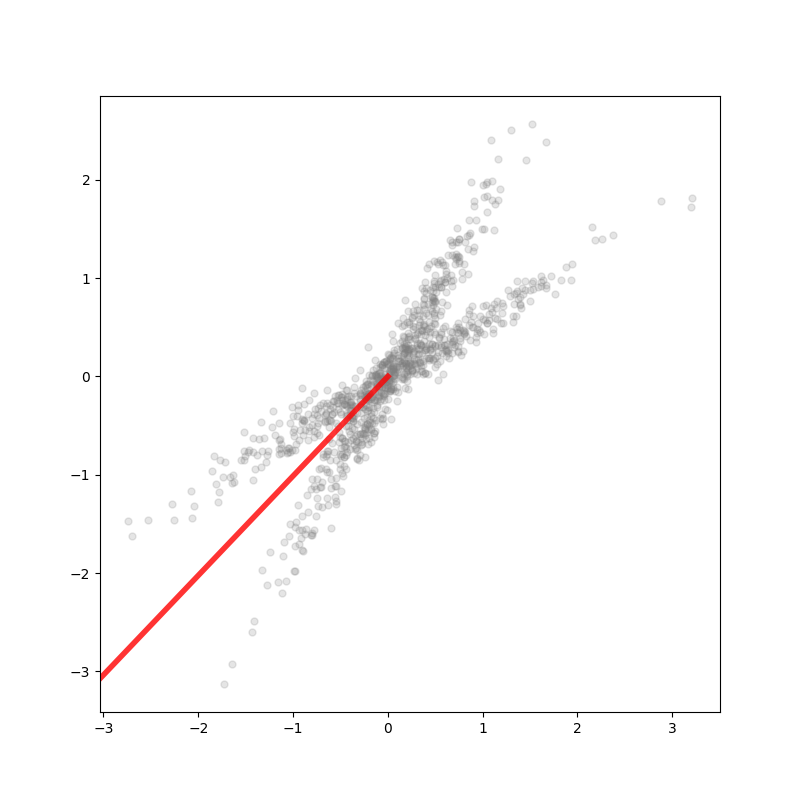

In [10]:
numTrials = 250
learningRate = 0.1

figure, plottedWeightVector, weights = util.initialize(D2)

weights = util.doLearn(hebbLearn, D2, figure, plottedWeightVector, weights, learningRate, numTrials)

<IPython.core.display.Javascript object>


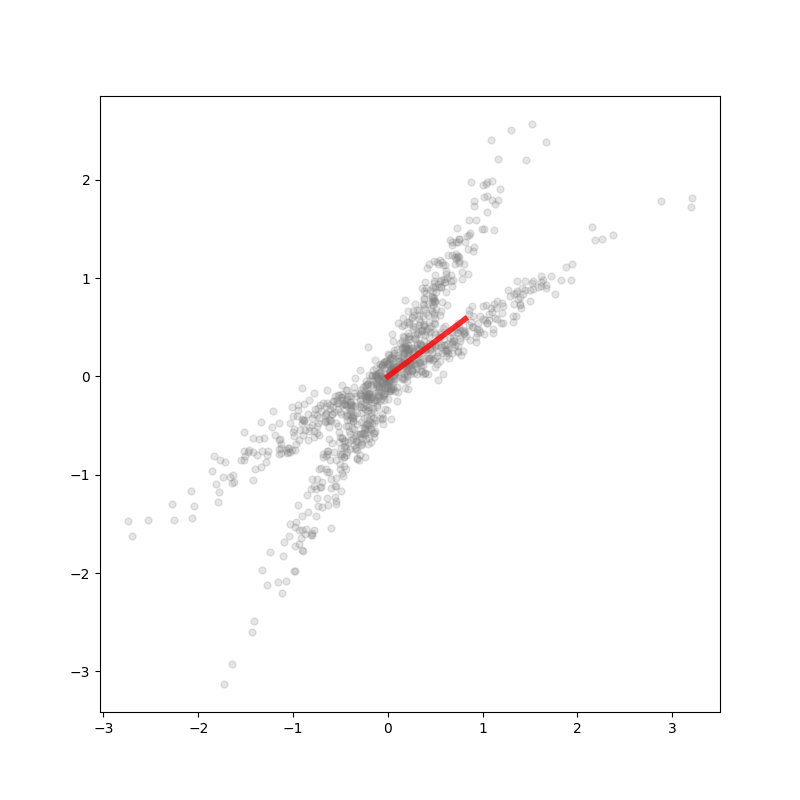

In [11]:
numTrials = 100
learningRate = 0.05

figure, plottedWeightVector, weights = util.initialize(D2)

weights = util.doLearn(ojaLearn, D2, figure, plottedWeightVector, weights, learningRate, numTrials)

<IPython.core.display.Javascript object>


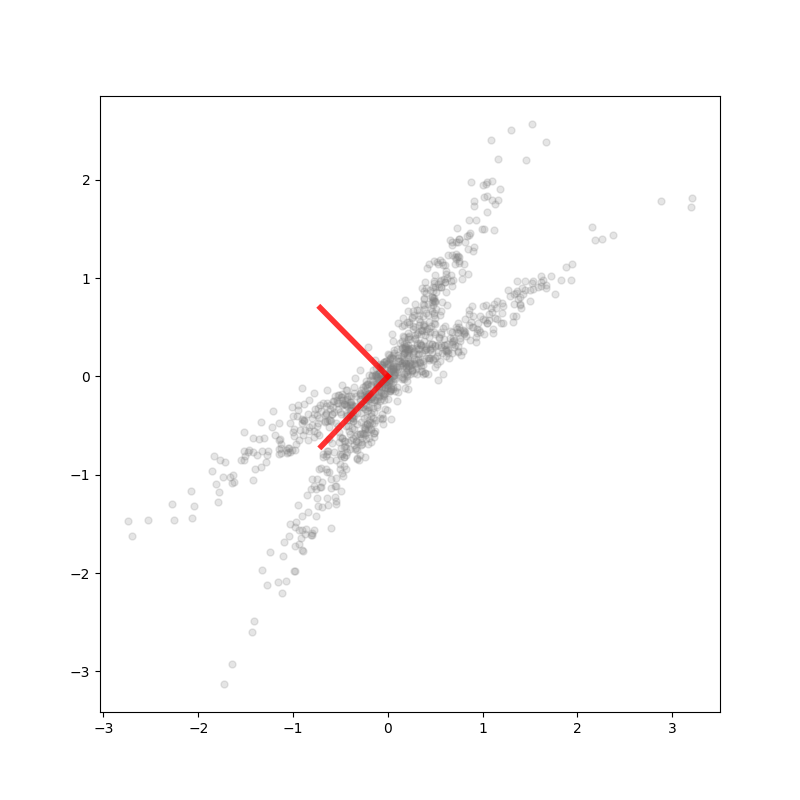

In [12]:
numTrials = 250
learningRate = 0.25

figure, plottedWeightVector, weights = util.initialize(D2, numOutputs=2)
weights = util.doLearn(sangerLearn, D2, figure, plottedWeightVector, weights, learningRate, numTrials)

### Winner-Take-All Networks



Now, train a 4-unit Winner-Take-All network using the standard competitive learning rule as in equation 9.7 from Hertz, Krogh, and Palmer. *HINT:* the numpy function `argmax` will be helpful for figuring out the winner for each input.

Don't worry if it takes multiple runs to get your algorithm to converge to the correct solution. Unlike Hebbian learning and other PCA methods, WTA learning is finicky -- the results are highly dependent on the initialization, which is typically random. If you want to make sure that your algorithm is coded correctly, pass `goodWeights=True` to the function `initializeWTA` below, which gives a non-random initialization that will work if you've coded WTA correctly. **NOTE** Your method may work with goodWeights=True even it isn't correct, please keep this in mind.

Once you've got the basic algorithm working, implement one (or more) of the strategies suggested on p221 of Hertz, Krogh, and Palmer to improve convergence behavior and reduce "dead units". A common choice is "leaky learning" -- update all neurons on every trial, but update winners with a learning rate that is at least an order of magnitude less.

In [13]:
def WTALearn(dataset,weights,learningRate):
    """
    Weight update with the WTA rule.
    weights and learningRate should be provided by output of initializeWTA()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2, shape=(2, 1000)
    weights      : numpy array, weight matrix of linear transformation of input 
                   data, shape=(2, N) where N is the number of neurons
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Sanger-updated weight matrix 
                                 of linear transformation of input data
    """
    
    _, numDatapoints = dataset.shape
    batchLearningRate = learningRate/numDatapoints
    
    output =  weights.T @ dataset # YOUR CODE: compute neuron output for all data
    winnerIndices =  np.argmax(output, axis = 0)#YOUR CODE: try np.argmax
    
    numOutputs = output.shape[0]
    
    dw = np.zeros(weights.shape)
    
    for i in range(numOutputs):
        masker = np.zeros((1,numDatapoints))
        
        winnerMask = np.asarray([winnerIndices==i],dtype='int32')
        
        
        masker[:,winnerIndices==i] = 1 #YOUR CODE: make a binary vector numDatapoints long that is 1 wherever neuron i was the "winner"    
    
        dw[:,i,None] = ((dataset - weights[:,i,None]) @ masker.T)# YOUR CODE: update neuron i to move it towards stimuli on which it "won"
    
    weights += batchLearningRate * dw #YOUR CODE: update weights by dw using batchLearningRate
    
    return weights

<IPython.core.display.Javascript object>


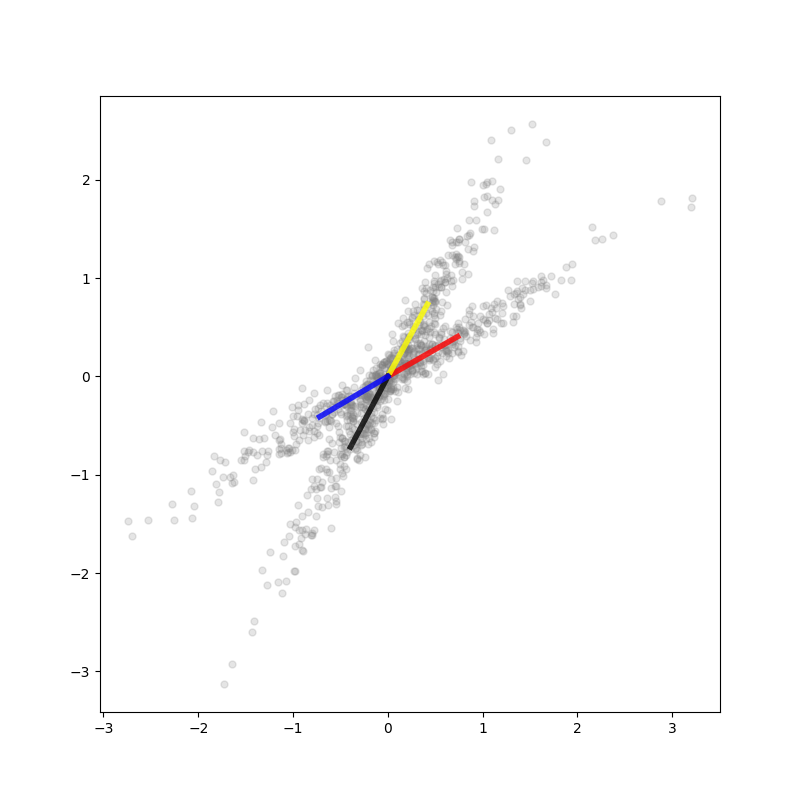

In [14]:
numTrials = 150
learningRate = 0.5

# pass goodWeights=True to use a non-random initialization
# that will converge if your algorithm is correctly implemented

figure, plottedWeightVectors, weights = util.initializeWTA(
                                          D2, goodWeights=True, numOutputs=4)

weights = util.doLearn(WTALearn, D2, figure, plottedWeightVectors, weights, learningRate, numTrials)

